# Pre-class work
Information provided:

● The data are normally distributed. The error margins given below represent 1

standard deviation from the mean of the parameter.

● Constraint: the mean of the data is approximately 2.3 ± 0.5.

● Constraint: the variance of the data is approximately 2.75 ± 1.

● Find μ₀, ν₀, α₀, β₀ hyperparameters for the normal-inverse-gamma prior that
match this information.

In [1]:
import numpy as np
import scipy.stats as sts
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# OPTIMIZATION SOLUTION

# Normal-inverse-gamma prior hyperparameters
parameters = [2.3, 2.75, 3, 1] # [mu, nu, alpha, beta] with alpha > 2 so that we don't have undefined functions below 

def objective_function(parameters):
    nu = parameters[1]
    alpha = parameters[2]
    beta = parameters[3]
    
    mean_of_mean = parameters[0]
    mean_of_variance = beta/(alpha-1)
    variance_of_mean = beta/((alpha-1)*nu)
    variance_of_variance = beta**2/(((alpha-1)**2)*(alpha-2))
    function = (mean_of_mean - 2.3)**2 + (mean_of_variance - 2.75)**2 + (variance_of_mean - 0.5)**2 + (variance_of_variance - 1)**2
    return function

# minimize() returns the max likelihood estimate over a range of parameters 
# – which is what we would usually use the posterior for in Bayes formula:
result = minimize(objective_function, parameters)
# Info about the minimum (e.g. whether it converges or not, etc.):
# NOTE: not sure about my syntax here, should "x" be "parameters"?
new_parameters = result.x  
print("The appropriate prior hyperparameters are:", new_parameters)

The appropriate prior hyperparameters are: [ 2.29999934  5.5000029   9.56248713 23.54682702]


ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

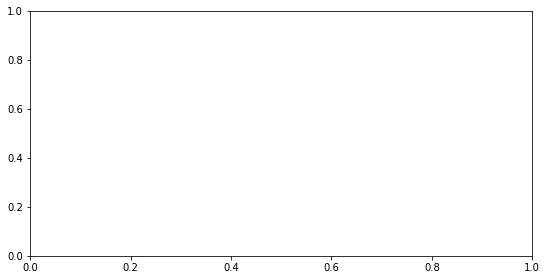

In [3]:
# VISUALIZATION 
# (not quite sure what I'm doing here, but I thought it might be interesting to
# visualize the result – current code does not work, however...)

plot_x = np.linspace(0, 10, 4)
plot_y = objective_function(plot_x)
plt.figure(figsize=(9, 4.5))
plt.plot(plot_x, plot_y)
for x_initial in [2.3, 2.75, 3, 1]:
    result = minimize(f, x_initial)
    x_final = result.x
    plt.plot([x_initial, x_final], [f(x_initial), f(x_final)], 'o')
    print('Started at %.2f; ended at %.2f; f(%.2f) = %.2f' % (
    x_initial, x_final, x_final, f(x_final)))
plt.show()

In [ ]:
# NORMAL-INVERSE-GAMMA DISTRIBUTION SOLUTION

# Definitions from Session 3.1:

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    # Probability density function of the normal-inverse-gamma 
    # x (mean) and sigma2 (variance).
    return (
        sts.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        sts.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    # Generate n samples from the normal-inverse-gamma distribution. 
    # This function returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    
    # Sample sigma^2 from the inverse-gamma distribution
    sigma2 = sts.invgamma.rvs(a=alpha, scale=beta, size=size)
    # Sample x from the normal distribution
    x = sts.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)
    return np.vstack((x, sigma2)).transpose()

# Define new parameters to plug into the distribution:
mu = new_parameters[0]
nu = new_parameters[1]
alpha = new_parameters[2]
beta = new_parameters[3]

# Generate the normal-inverse-gamma-distribution over these parameters:
samples = norminvgamma_rvs(mu, nu, alpha, beta, size=10000)
print(samples)

# Not sure why code is not running... 

"""
plt.figure(None, (8, 4))
domain = np.linspace(-100, 100, 10000)
for each in samples:
    plt.plot(domain, sts.norm.pdf(domain, each[0], each[1]))
plt.show()
"""

#print(samples[:,0].mean(), samples[:,0].std())
#print(samples[:,1].mean(), samples[:,1].std())

# Personal notes

In [ ]:
def f(x):
# Define the function to maximize
    return np.exp(-(x-2)**2)
def minus_f(x):
# Negative of the function above so we can minimize this one
    return -f(x)
result = minimize(minus_f, 1)
print(result.x)

In [ ]:
def f(x):
    return np.sin(x * np.cos(x))

plot_x = np.linspace(0, 10, 500)
plot_y = f(plot_x)
plt.figure(figsize=(9, 4.5))
plt.plot(plot_x, plot_y)
for x_initial in [2, 4, 6, 8]:
    result = minimize(f, x_initial)
    x_final = result.x
    plt.plot([x_initial, x_final], [f(x_initial), f(x_final)], 'o')
    print('Started at %.2f; ended at %.2f; f(%.2f) = %.2f' % (
    x_initial, x_final, x_final, f(x_final)))
plt.show()

In [ ]:
# Rosenbrook function
# The global minimum is inside a long, narrow, parabolic shaped flat valley. 
# To find the valley is trivial. To converge to the global minimum, however, is difficult.

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm # Color maps
import numpy as np
# Set up figure and 3d axes
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
# Make the data to plot
x = np.linspace(-2, 2, 25)
y = np.linspace(-1, 3, 25)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2 # turning 2d graph into 3d space
# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.PiYG_r)
plt.show()

# Using minimize to solve this non-visually:
import numpy as np
from scipy.optimize import minimize
def f(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
x_initial = np.array([0, 0])
result = minimize(f, x_initial)
x_final = result.x
print('Started at', x_initial)
print('Ended at', x_final)
print('f(%s) = %.6f' % (x_final, f(x_final)))

In [ ]:
# HIMMELBLAU FUNCTION

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm # Color maps
import numpy as np
# Set up figure and 3d axes
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
# Make the data to plot
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2 # Himmelblau formula
# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, vmin=0, vmax=800)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(60, 120) # Rotate 3d axes for a better view
plt.show()

# Non-visually using minimize
import numpy as np
from scipy.optimize import minimize
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
for x_initial in [
np.array([-4, -4]),
np.array([2, -2]),
np.array([2, 2]),
np.array([-4, 4])
]:
    result = minimize(f, x_initial)
    x_final = result.x
print('Started at', x_initial)
print('Ended at', x_final)
print('f(%s) = %.6f' % (x_final, f(x_final)))
print()